In [1]:
pip install opencv-python


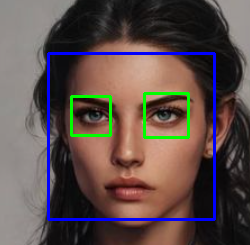

In [9]:
import cv2
from google.colab.patches import cv2_imshow


# Load the pre-trained Haar Cascade classifiers for face, eye, and smile detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

# Read the image
image = cv2.imread('/content/Screenshot 2024-09-08 12.47.20.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Draw rectangles around detected faces, and detect eyes and smiles within each face
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    # Detect eyes within the face
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    # Detect smiles within the face
    smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22)
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)

# Display the output
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
